In [1]:

import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv("medidas.csv")
temp = temp[["data_hora", "valor"]]
temp.data_hora = pd.to_datetime(temp.data_hora)
temp.valor = pd.to_numeric(temp.valor)
temp.set_index("data_hora", inplace=True)
filtro = (
    (temp.valor != -1000)
    & (temp.index >= "2022-02-14 00:00")
    & (temp.index <= "2022-02-17 23:59")
)
temp = temp[filtro]
temp.info()
temp.head()
temp = temp.resample("T").median()
temp = temp.fillna(temp.mean())
temp.head()
# from google.colab import files
# temp.to_csv("temp.csv")
# qfiles.download("temp.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5760 entries, 2022-02-14 00:00:00 to 2022-02-17 23:59:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   5760 non-null   float64
dtypes: float64(1)
memory usage: 90.0 KB


,valor
data_hora,
2022-02-14 00:00:00,-38.5438
2022-02-14 00:01:00,-39.2590
2022-02-14 00:02:00,-38.9971
2022-02-14 00:03:00,-39.2736
2022-02-14 00:04:00,-38.6516


<Axes: xlabel='data_hora'>

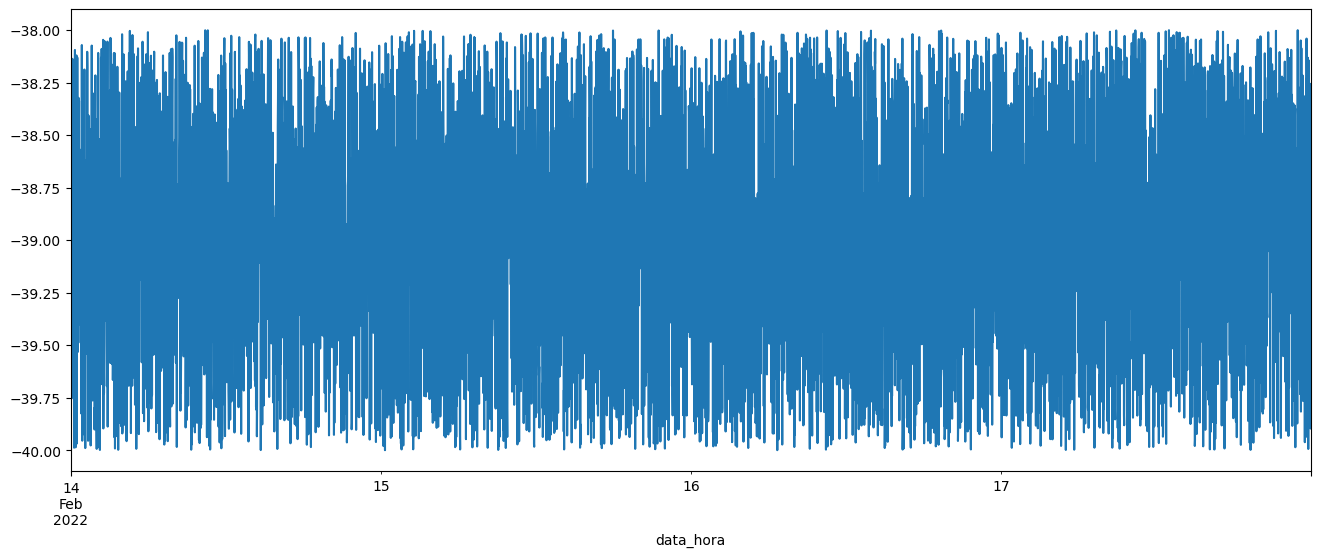

In [2]:
temp.valor.plot(figsize=(16, 6))

<Axes: xlabel='data_hora'>

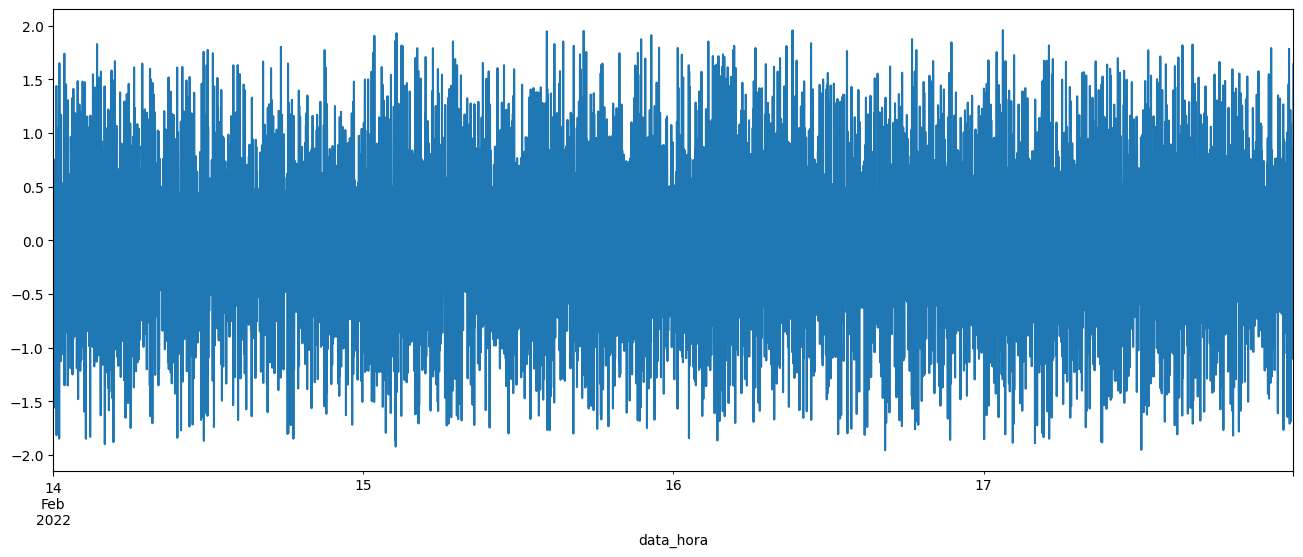

In [3]:
temp.valor.diff().plot(figsize=(16, 6))

<Axes: xlabel='data_hora'>

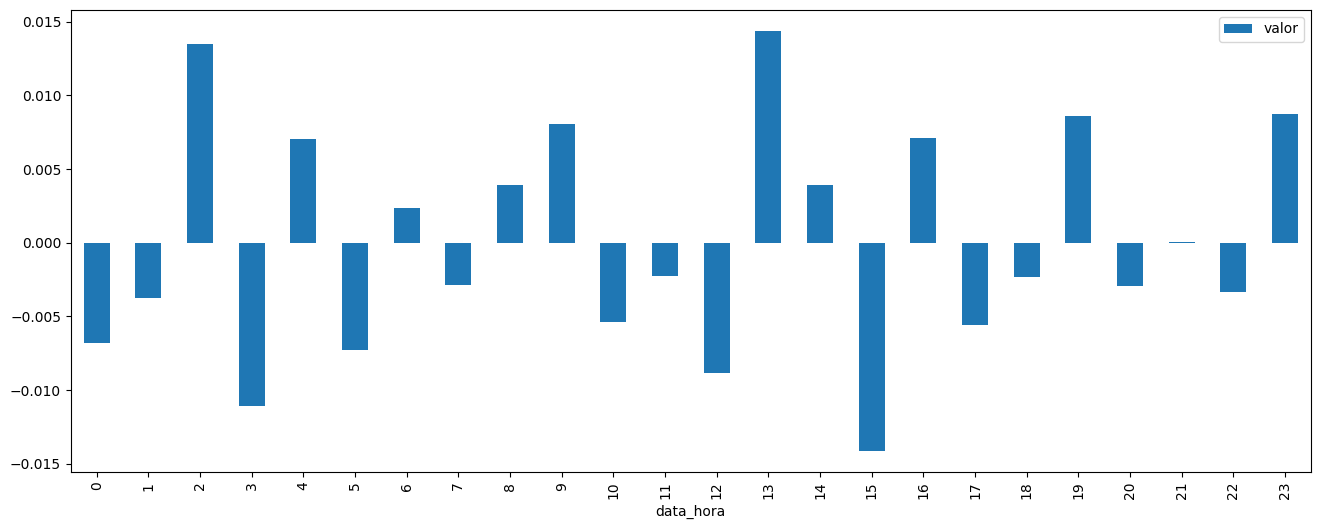

In [4]:
temp.diff().groupby(temp.index.hour).mean().plot(kind="bar", figsize=(16, 6))

C:\Users\Alann\AppData\Local\Temp\ipykernel_10416\2936473031.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1600x600 with 0 Axes>

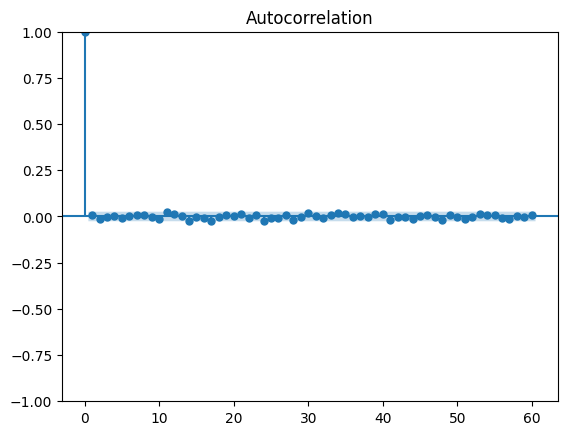

In [5]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(16, 6))
plot_acf(temp["valor"], lags=60)
plt.show()

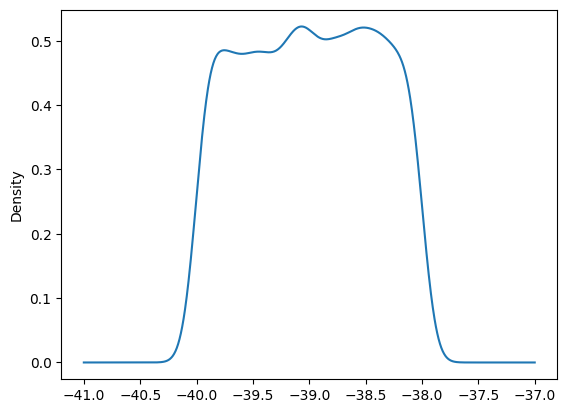

In [6]:
temp["valor"].plot(kind="kde")
plt.show()

In [7]:
import scipy.stats as stats
skew = stats.skew(temp["valor"])
print(skew)

-0.02539111652395516


In [8]:
from scipy.stats import normaltest

stat, p = normaltest(temp["valor"])
# p < 0.05 indica que a d i s t r i b u i o n o uma normal
print(p)
ad_stat, ad_critico, ad_teorico = stats.anderson(temp["valor"], "norm")
print(ad_stat)
print(ad_critico)
print(ad_teorico)

0.0
61.15422763121569
[0.576 0.656 0.786 0.917 1.091]
[15.  10.   5.   2.5  1. ]


C:\Users\Alann\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.588814594438783


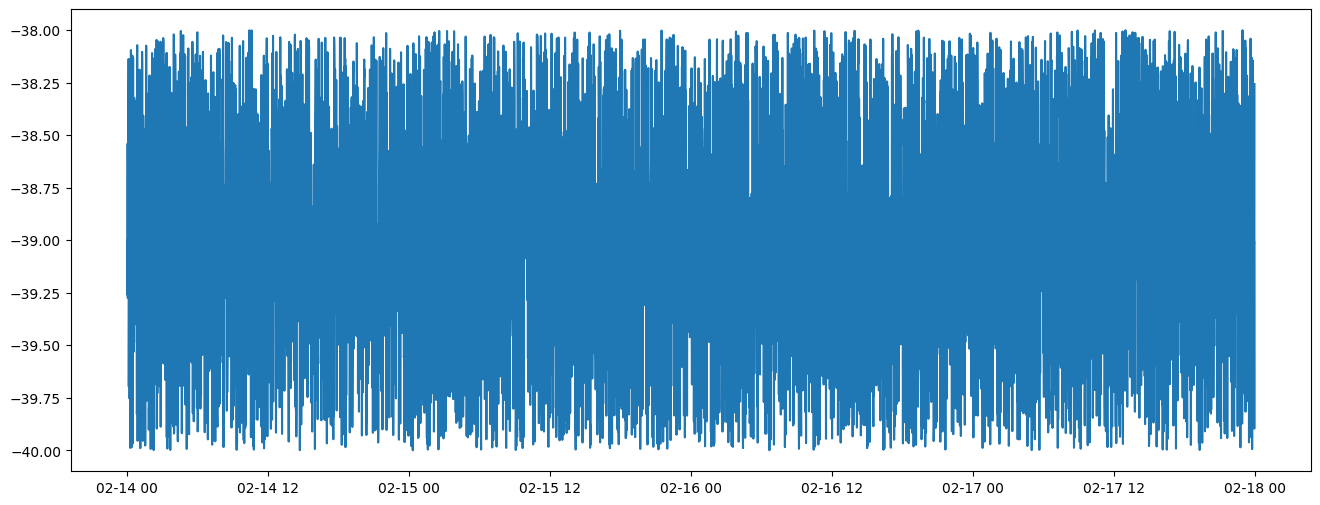

In [10]:
from statsmodels.tsa.arima.model import ARIMA


arima = ARIMA(temp.valor, freq="T", order=(3, 1, 10)).fit()

print((arima.resid**2).mean())

plt.figure(figsize=(16, 6))
plt.plot(temp["valor"])

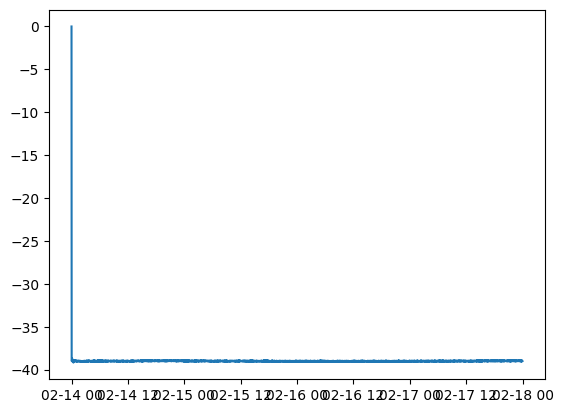

In [15]:
plt.plot(arima.predict(typ="levels"))

2022-02-18   -38.942674
Freq: T, dtype: float64


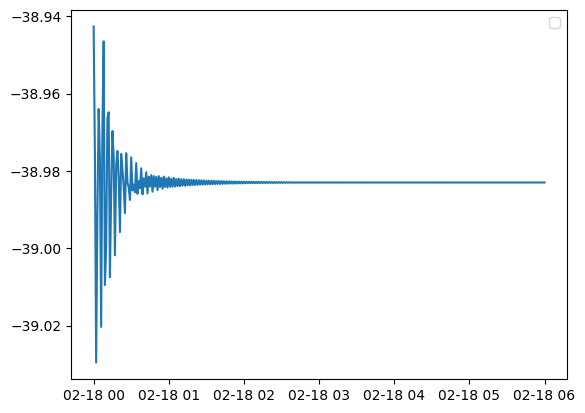

In [19]:
print(arima.forecast())
plt.legend(["Dados de Treinamento (Reais)", "Modelo ARIMA", "Previs o"])
arima_data = arima.predict(
    typ="levels", start="2022-02-18 00:00:00", end="2022-02-18 06:00:00"
)
plt.plot(arima_data)

C:\Users\Alann\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.588814594438783
2022-02-18   -38.942674
Freq: T, dtype: float64


C:\Users\Alann\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


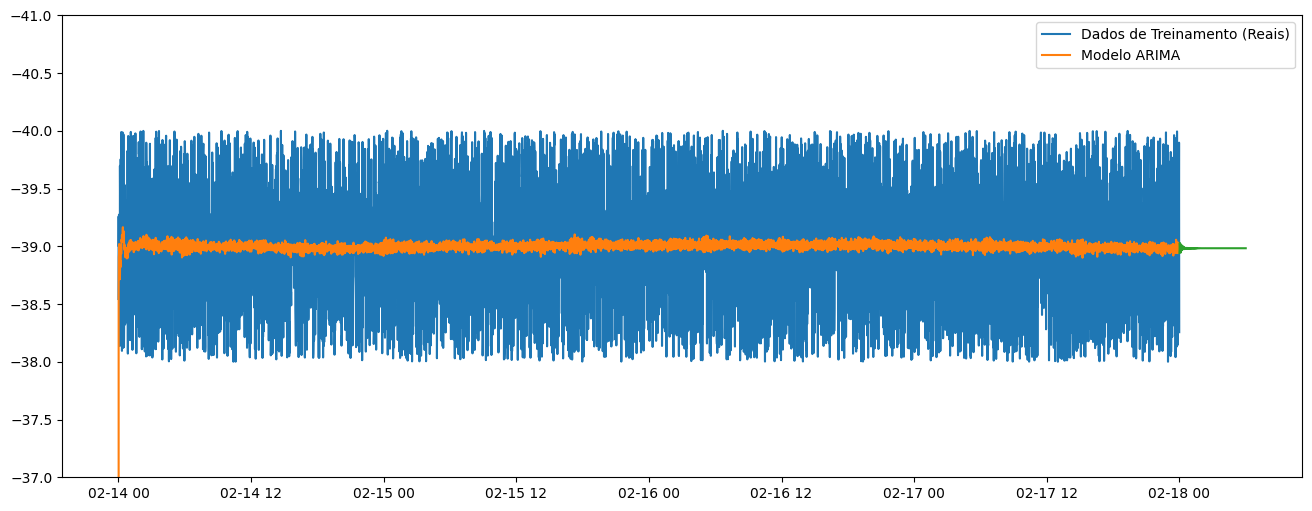

In [24]:
arima = ARIMA(temp.valor, freq="T", order=(3, 1, 10)).fit()

print((arima.resid**2).mean())

plt.figure(figsize=(16, 6))
plt.plot(temp["valor"])

plt.ylim(-37, -41)
plt.plot(arima.predict(typ="levels"))

print(arima.forecast())
plt.legend(["Dados de Treinamento (Reais)", "Modelo ARIMA", "Previs o"])
arima_data = arima.predict(
    typ="levels", start="2022-02-18 00:00:00", end="2022-02-18 06:00:00"
)

plt.plot(arima_data)